# Introduction
The goal of this project is to analyze a synthetic dataset from the National Parks Service. 

# Import Python Modules

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the Data
In this analysis we are going to be examining two datasets. 

In [13]:
observations = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/Endangered%20Species/observations.csv')
species = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/Endangered%20Species/species_info.csv')

# Species
The species dataset consists of 4 columns: category, scientific name, common names, and conservation status. 

In [26]:
species.head()
print(f'There are unique {species.scientific_name.nunique()} species!')

There are unique 5541 species!


# Observations
The oberservations dataset consists 3 of columns: scientific name, park name, and number of observations.

In [15]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Exploratory Data Analysis (EDA)
To begin our exploratory data analysis we are going to join our datasets so we can compare variables.

In [16]:
df = observations.merge(species, how='inner')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [17]:
observations_shape = observations.shape
species_shape = species.shape
df_shape = df.shape
print(f'The species has {species_shape[0]} rows and {species_shape[1]} columns while observations has {observations_shape[0]} rows and {observations_shape[1]} columns.')
print(f'Together, the merged dataframe has {df_shape[0]} rows and {df_shape[1]} columns.')

The species has 5824 rows and 4 columns while observations has 23296 rows and 3 columns.
Together, the merged dataframe has 25632 rows and 6 columns.


In [18]:
df.describe()

,observations
count,25632.000000
mean,142.214693
std,69.912475
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


## What are the average number of animal observations at each park?

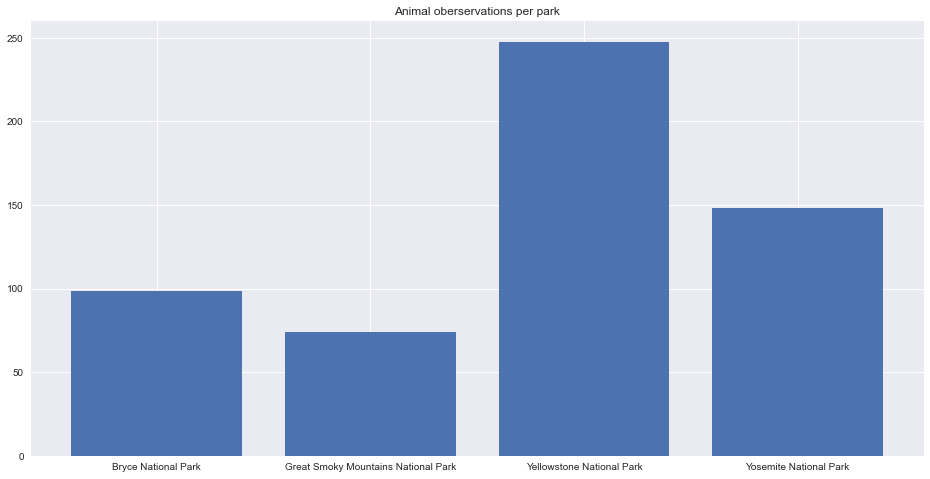

<Figure size 576x396 with 0 Axes>

In [25]:
mean_observations = df.groupby('park_name')['observations'].mean()
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16,8))
plt.bar(mean_observations.index, mean_observations)
plt.title('Animal oberservations per park')
plt.show()
plt.clf()

According to our bar graph, it seems that Yellowstone is the winner when it comes to mean animal observations. What does that mean exactly? Well to put it frankly they see more animals, but because it is the average of all animals in the area it is greatly influenced by outliers. For example, if there is a common animal in the area that never seems to go away, it could be skewing Yosemite to its high average. Nevertheless, if you want to see more animals it seems that Yosemite is your best bet.

# Data Scrubbing

In [20]:
df.conservation_status.fillna('Least Concern', inplace=True)
df.groupby('conservation_status').sum()

,observations
conservation_status,
Endangered,3513
In Recovery,2107
Least Concern,3542326
Species of Concern,93962
Threatened,3339


In [21]:
df.isna().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

# Analysis

In [32]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 0, 'Conservation Status')

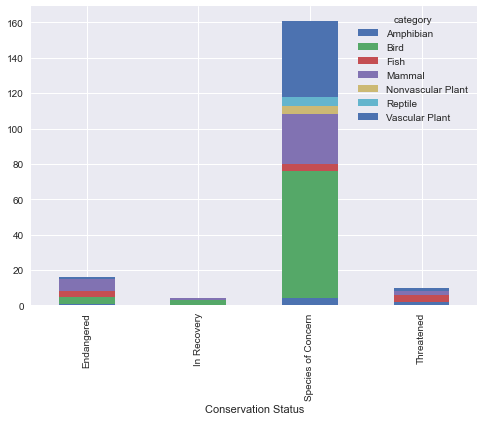

In [43]:
ax = conservationCategory.plot(kind='bar', stacked=True)
ax.set_xlabel('Conservation Status')

# Statistical Significance

# Conclusions